## Import Libraries and Data

In [1]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_DoE_2407-0308-2023.csv', firstRow=684, lastRow=690)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_250723_S685-690.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)
#default t_baseline=25

## Analyse Water Addition

In [2]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=54s and ended at t=462s; mass=44.73865g
This equals a volume of 44.828m; expected was 45.331mL; error is 1.109%


## Analyse Surfactants

Peak threshold for 1st derivative = 0.0015 g/s and for 2nd derivative = 0.0003125 g/s^2


<IPython.core.display.Javascript object>


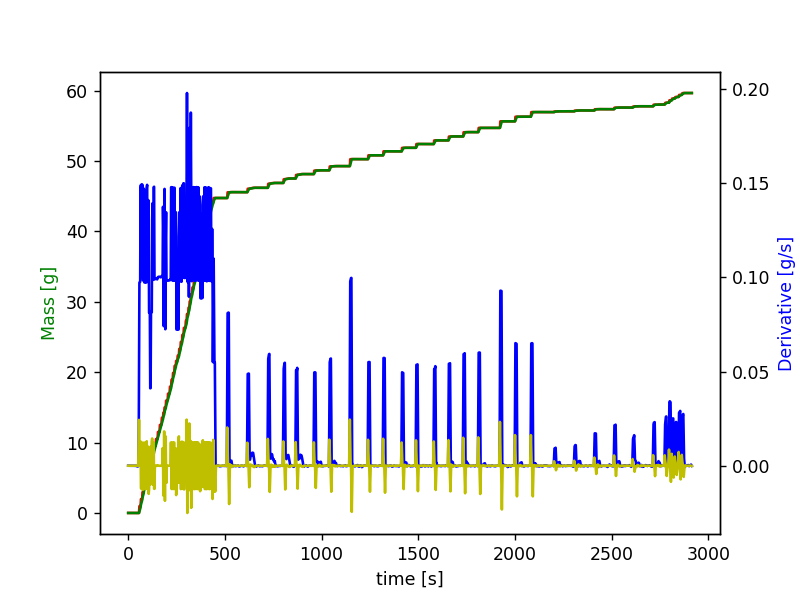

Addition of 0.836g Plantapon ACG 50 detected from 508s to 540s - expected volume = 0.823mL and actual volume = 0.739mL (resulting error is 10.097%)
Addition of 0.628g Plantapon LC 7 detected from 612s to 660s - expected volume = 0.775mL and actual volume = 0.596mL (resulting error is 23.088%)
Addition of 0.689g Plantacare 818 detected from 718s to 764s - expected volume = 0.806mL and actual volume = 0.633mL (resulting error is 21.503%)
Addition of 0.635g Plantacare 818 detected from 798s to 840s - expected volume = 0.528mL and actual volume = 0.579mL (resulting error is 9.629%)
Addition of 0.631g Plantacare 818 detected from 862s to 910s - expected volume = 0.528mL and actual volume = 0.575mL (resulting error is 8.835%)
Addition of 0.537g Dehyton MC detected from 956s to 1004s - expected volume = 0.518mL and actual volume = 0.497mL (resulting error is 3.953%)
Addition of 0.598g Dehyton MC detected from 1036s to 1076s - expected volume = 0.518mL and actual volume = 0.554mL (resulting er

In [3]:
# default: bl_mult=5, mergeSens=10
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant', steps=steps,start_idx=t1,show=True)

#t2 = massProfile.defineIngredientsManually(specType='surfactant',steps=steps,show=True,manualTimes=[560,600,700,800,900,1000,1100,1150,1250,1320,1400,1500,1580,1650,1730,1830,1920,2000,2080,2140])

## Analyse Polyelectrolytes

Peak threshold for 1st derivative = 0.00125 g/s and for 2nd derivative = 0.000328125 g/s^2


<IPython.core.display.Javascript object>


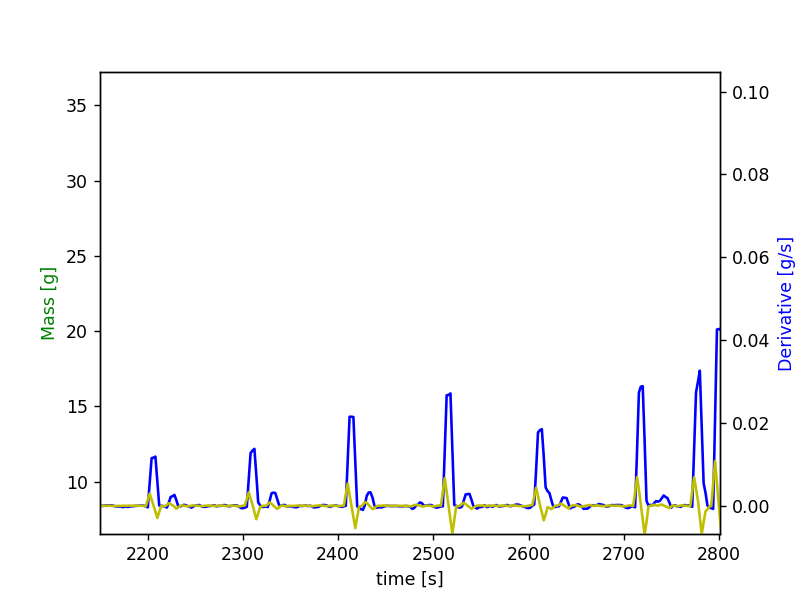

Addition of 0.109g Salcare Super 7 detected from 2198s to 2236s - expected volume = 0.145mL and actual volume = 0.098mL (resulting error is 32.109%)
Addition of 0.129g Salcare Super 7 detected from 2302s to 2342s - expected volume = 0.111mL and actual volume = 0.116mL (resulting error is 4.878%)
Addition of 0.187g Salcare Super 7 detected from 2406s to 2442s - expected volume = 0.176mL and actual volume = 0.166mL (resulting error is 5.808%)
Addition of 0.233g Salcare Super 7 detected from 2508s to 2546s - expected volume = 0.202mL and actual volume = 0.211mL (resulting error is 4.428%)
Addition of 0.186g Salcare Super 7 detected from 2604s to 2646s - expected volume = 0.13mL and actual volume = 0.168mL (resulting error is 29.167%)
Addition of 0.254g Salcare Super 7 detected from 2710s to 2752s - expected volume = 0.241mL and actual volume = 0.228mL (resulting error is 5.53%)


In [7]:
# default bl_mult = 5, default mergeSens = 5
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=3, mergeSens=8, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

#t3 = massProfile.defineIngredientsManually(specType='polyelectrolyte',steps=steps,show=True,manualTimes=[2014,2112,2210,2314,2412,2494,2564])

## Analyse Thickeners

Peak threshold for 1st derivative = 0.005 g/s and for 2nd derivative = 0.001 g/s^2


<IPython.core.display.Javascript object>


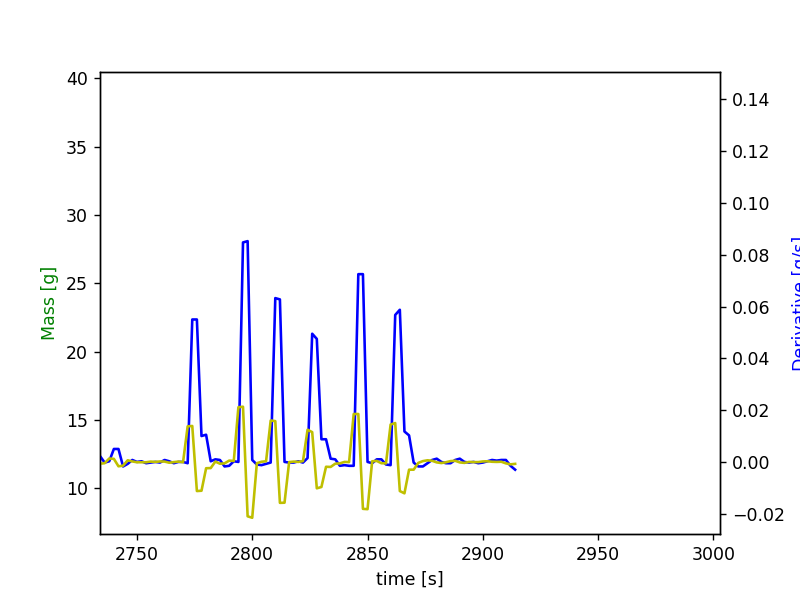

Addition of 0.264g Arlypon TT detected from 2770s to 2786s - expected volume = 0.292mL and actual volume = 0.276mL (resulting error is 5.376%)
Addition of 0.334g Arlypon TT detected from 2792s to 2804s - expected volume = 0.324mL and actual volume = 0.347mL (resulting error is 7.212%)
Addition of 0.246g Arlypon TT detected from 2806s to 2818s - expected volume = 0.21mL and actual volume = 0.254mL (resulting error is 20.833%)
Addition of 0.233g Arlypon TT detected from 2822s to 2838s - expected volume = 0.197mL and actual volume = 0.245mL (resulting error is 24.202%)
Addition of 0.282g Arlypon TT detected from 2842s to 2854s - expected volume = 0.274mL and actual volume = 0.295mL (resulting error is 7.824%)
Addition of 0.265g Arlypon TT detected from 2858s to 2874s - expected volume = 0.247mL and actual volume = 0.275mL (resulting error is 11.345%)


In [8]:
# default bl_mult = 1, default mergeSens = 1
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=1, mergeSens=1, specType='thickener',steps=steps,start_idx=t3,show=True)

#t4 = massProfile.defineIngredientsManually(specType='thickener',steps=steps,show=True,manualTimes=[2600,2616,2636,2656,2676,2884,2906])

## Consolidate results and create output

In [9]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_250723_S685-S690.csv', index=False)
actualMassFractions

C:\Users\ACHI01\AppData\Local\Temp\ipykernel_12996\2517794129.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for entry in sampleList[i].addedMassSeries.iteritems():


,ID,Texapon SB 3 KC,Plantapon ACG 50,Plantapon LC 7,Plantacare 818,Plantacare 2000,Dehyton MC,Dehyton PK 45,Dehyton ML,Dehyton AB 30,Plantapon Amino SCG-L,Plantapon Amino KG-L,Dehyquart A-CA,Luviquat Excellence,Dehyquart CC6,Dehyquart CC7 Benz,Salcare Super 7,Arlypon F,Arlypon TT
684,685.0,0.0,8.376211,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000,10.904803,0.000000,0.0,0.0,0.0,1.088226,0.0,2.644803
685,686.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,11.073507,10.33903,0.000000,0.000000,0.0,0.0,0.0,1.275203,0.0,3.306631
686,687.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000,12.050984,9.231302,0.0,0.0,0.0,1.853615,0.0,2.449953
687,688.0,0.0,0.000000,6.253728,0.000000,0.0,11.307728,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,2.320486,0.0,2.326714
688,689.0,0.0,0.000000,0.000000,6.903970,0.0,0.000000,9.985312,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,1.863230,0.0,2.829906
689,690.0,0.0,0.000000,0.000000,12.365995,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,12.931549,0.0,0.0,0.0,2.482234,0.0,2.588459
